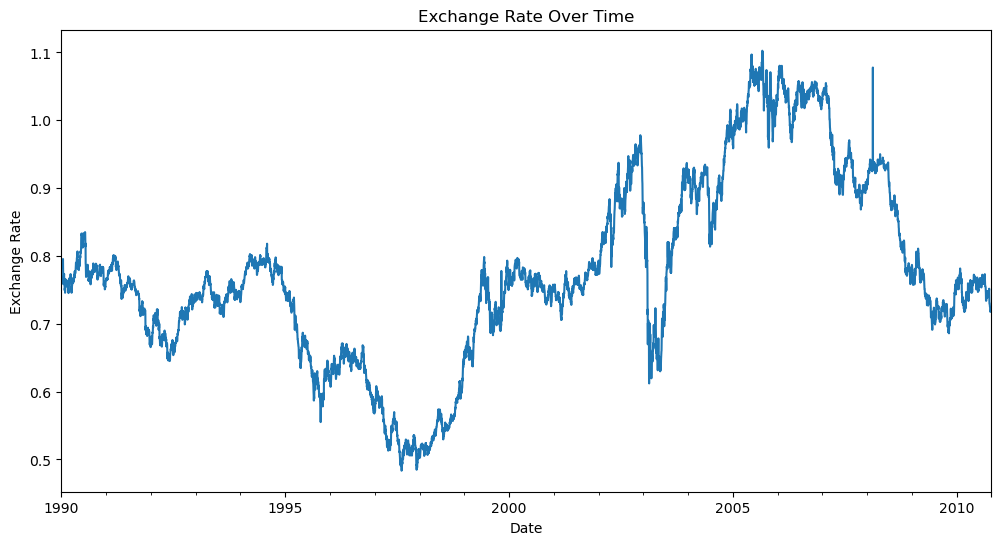

ADF Statistic: -1.664994180738078
p-value: 0.44923273535982894
Critical Values: {'1%': -3.4312123140180137, '5%': -2.861921078147796, '10%': -2.5669728434336108}
The time series is NOT stationary.


D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

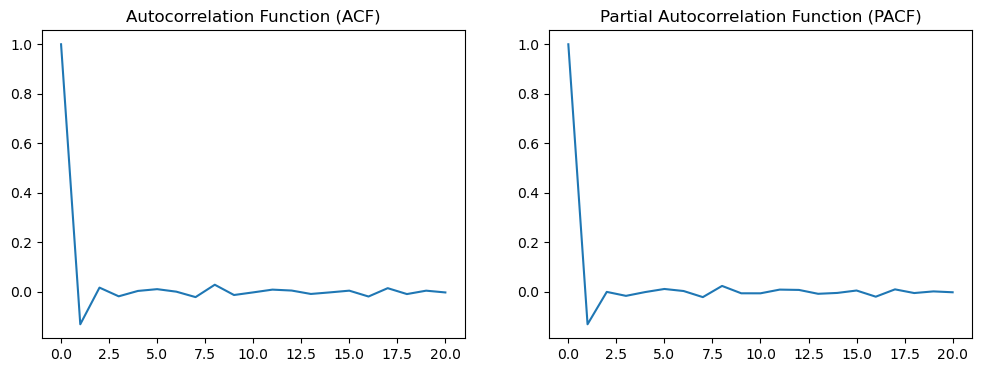

D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Wed, 26 Feb 2025   AIC                         -56102.322
Time:                        16:56:54   BIC                         -56081.519
Sample:                    01-01-1990   HQIC                        -56095.182
                         - 10-10-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

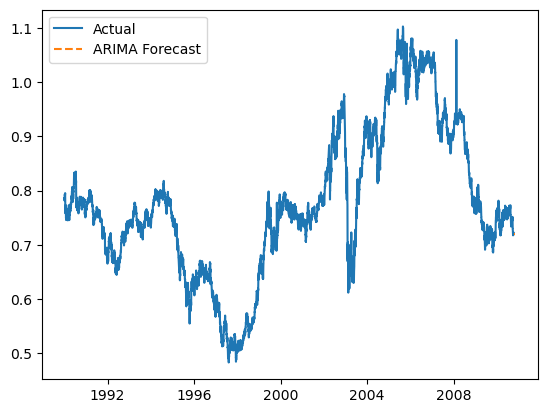

D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


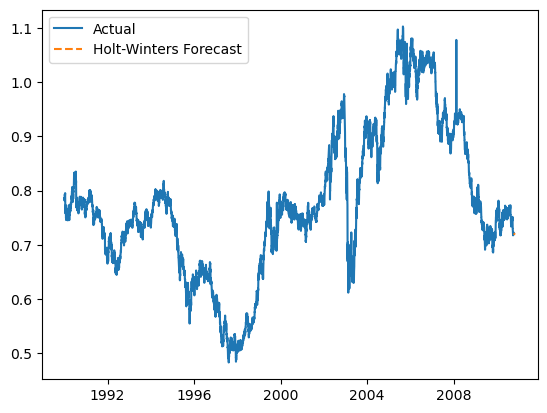

ARIMA MAE: 0.012724006489305202, RMSE: 0.016982710912755217
Holt-Winters MAE: 0.012942882731914096, RMSE: 0.017191325478858828


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load dataset
df = pd.read_csv(r"C:\Users\Owner\OneDrive\Desktop\SVM\Timeseries\exchange_rate.csv")

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y %H:%M')

# Set date as index
df.set_index('date', inplace=True)

# Check for missing values
df = df.dropna()

# Plot time series
df['Ex_rate'].plot(figsize=(12, 6), title='Exchange Rate Over Time', ylabel='Exchange Rate', xlabel='Date')
plt.show()

# Check stationarity using Augmented Dickey-Fuller test
def adf_test(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:", result[4])
    if result[1] <= 0.05:
        print("The time series is stationary.")
    else:
        print("The time series is NOT stationary.")

adf_test(df['Ex_rate'])

# Differencing if needed
df['Ex_rate_diff'] = df['Ex_rate'].diff().dropna()

# ACF and PACF plots to determine ARIMA parameters
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.lineplot(data=acf(df['Ex_rate_diff'].dropna(), nlags=20), ax=axes[0])
axes[0].set_title("Autocorrelation Function (ACF)")
sns.lineplot(data=pacf(df['Ex_rate_diff'].dropna(), nlags=20), ax=axes[1])
axes[1].set_title("Partial Autocorrelation Function (PACF)")
plt.show()

# Fit ARIMA Model (p,d,q determined from ACF/PACF)
p, d, q = 1, 1, 1  # Example values, should be adjusted based on plots
arima_model = ARIMA(df['Ex_rate'], order=(p, d, q))
arima_result = arima_model.fit()
print(arima_result.summary())

# Forecast using ARIMA
forecast_arima = arima_result.forecast(steps=30)
plt.plot(df.index, df['Ex_rate'], label='Actual')
plt.plot(pd.date_range(df.index[-1], periods=30, freq='D'), forecast_arima, label='ARIMA Forecast', linestyle='dashed')
plt.legend()
plt.show()

# Fit Exponential Smoothing Model
hw_model = ExponentialSmoothing(df['Ex_rate'], trend='add', seasonal=None, damped_trend=True).fit()
forecast_hw = hw_model.forecast(steps=30)

# Plot Exponential Smoothing Forecast
plt.plot(df.index, df['Ex_rate'], label='Actual')
plt.plot(pd.date_range(df.index[-1], periods=30, freq='D'), forecast_hw, label='Holt-Winters Forecast', linestyle='dashed')
plt.legend()
plt.show()

# Evaluate Models
mae_arima = mean_absolute_error(df['Ex_rate'][-30:], forecast_arima)
rmse_arima = np.sqrt(mean_squared_error(df['Ex_rate'][-30:], forecast_arima))
mae_hw = mean_absolute_error(df['Ex_rate'][-30:], forecast_hw)
rmse_hw = np.sqrt(mean_squared_error(df['Ex_rate'][-30:], forecast_hw))

print(f"ARIMA MAE: {mae_arima}, RMSE: {rmse_arima}")
print(f"Holt-Winters MAE: {mae_hw}, RMSE: {rmse_hw}")
